In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/mini_project_oct/mel_spectrogram',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Change to 'binary' for binary classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/mini_project_oct/mel_spectrogram',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Change to 'binary' for binary classification
    subset='validation'
)

# Create the ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)  # num_classes is the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define a callback to save model weights at each epoch
checkpoint = ModelCheckpoint("resnet50_mel_seg_weights_epoch_{epoch:02d}.h5",
                             save_best_only=False,
                             save_weights_only=True,
                             period=1)

# Train the model
epochs = 75
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint]  # Use the ModelCheckpoint callback
)

Found 3581 images belonging to 5 classes.
Found 893 images belonging to 5 classes.
94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112,

Epoch 1/75
112/112 [==============================] - 2980s 26s/step - loss: 1.7590 - accuracy: 0.3343 - val_loss: 1.6308 - val_accuracy: 0.2520
Epoch 2/75
112/112 [==============================] - 139s 1s/step - loss: 1.4175 - accuracy: 0.3834 - val_loss: 1.6167 - val_accuracy: 0.2340
Epoch 3/75
112/112 [==============================] - 140s 1s/step - loss: 1.3802 - accuracy: 0.3985 - val_loss: 1.6551 - val_accuracy: 0.2307
Epoch 4/75
112/112 [==============================] - 139s 1s/step - loss: 1.3489 - accuracy: 0.4247 - val_loss: 1.7397 - val_accuracy: 0.2038
Epoch 5/75
112/112 [==============================] - 139s 1s/step - loss: 1.3409 - accuracy: 0.4328 - val_loss: 1.6684 - val_accuracy: 0.2374
Epoch 6/75
112/112 [==============================] - 140s 1s/step - loss: 1.3262 - accuracy: 0.4415 - val_loss: 1.6104 - val_accuracy: 0.2520
Epoch 7/75
112/112 [==============================] - 141s 1s/step - loss: 1.3076 - accuracy: 0.4535 - val_loss: 1.6014 - val_accuracy: 0.26

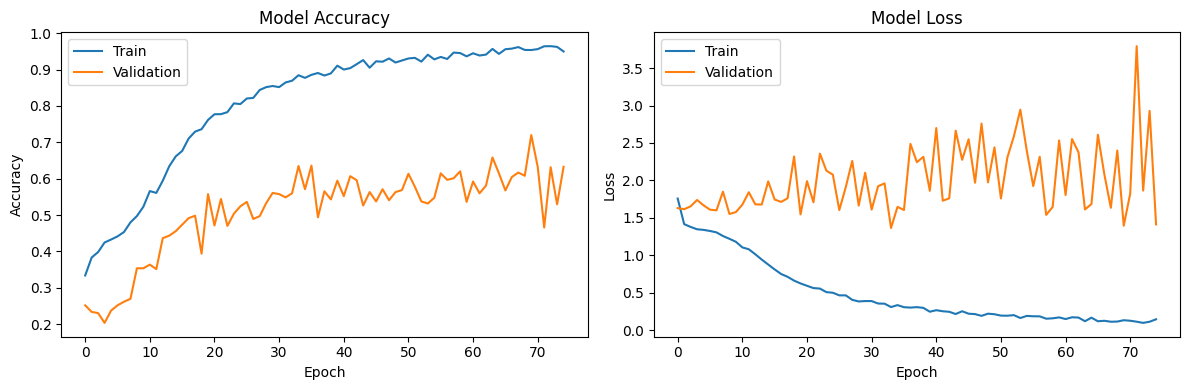

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns



# Visualize training metrics (loss and accuracy)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

28/28 [==============================] - 16s 568ms/step


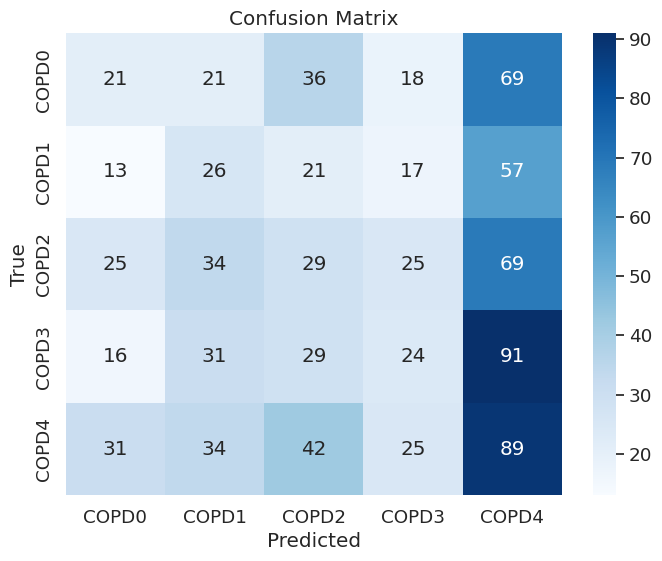


Classification Report:
              precision    recall  f1-score   support

       COPD0       0.20      0.13      0.15       165
       COPD1       0.18      0.19      0.19       134
       COPD2       0.18      0.16      0.17       182
       COPD3       0.22      0.13      0.16       191
       COPD4       0.24      0.40      0.30       221

    accuracy                           0.21       893
   macro avg       0.20      0.20      0.19       893
weighted avg       0.21      0.21      0.20       893



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Use the trained model to make predictions on the validation data
validation_data = validation_generator
y_true = validation_data.classes  # True labels
y_pred = model.predict(validation_data)  # Predicted probabilities

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=-1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Get class names
class_names = list(validation_data.class_indices.keys())

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)


In [ ]:
model.save('/content/resnet50_final.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your custom-trained ResNet-50 model
model = tf.keras.models.load_model('/content/resnet50_final.h5')

# Load and preprocess an image for classification

img_path = '/content/COPD0_melspect_100.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the pixel values if your custom model expects it

# Make predictions
predictions = model.predict(img_array)

# You can process the predictions as needed based on your custom model's output
# For example, if you have a multi-class classification model, you might want to get the class with the highest probability:
predicted_class = np.argmax(predictions, axis=1)

# You can also interpret the class index based on your training data if you have a label mapping
# For example, if you have a list of class labels:
class_labels = ['COPD0', 'COPD1', 'COPD2','COPD3','COPD4']
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted class: {predicted_label}")

1/1 [==============================] - 1s 1s/step
Predicted class: COPD0


In [ ]:
import os
import random
import shutil

# Specify the source directory where your image directories are located
source_directory = "/content/drive/MyDrive/mini_project_oct"
# Specify the destination directory where you want to store the selected images
destination_directory = "/content/res"
# Number of images to select
num_images_to_select = 1000

# Get a list of all image files from the source directory
image_files = []

for root, dirs, files in os.walk(source_directory):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            image_files.append(os.path.join(root, file))

# Randomly select the specified number of images
selected_images = random.sample(image_files, num_images_to_select)

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Copy the selected images to the destination directory
for image in selected_images:
    shutil.copy(image, destination_directory)

In [ ]:
import os

# Specify the directory path you want to count files in
directory_path = "/content/res"

# Use os.listdir() to get a list of all items (files and subdirectories) in the specified directory
items = os.listdir(directory_path)

# Initialize a counter for files
file_count = 0

# Iterate through the items and count the files
for item in items:
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path):
        file_count += 1

print(f"Number of files in {directory_path}: {file_count}")

Number of files in /content/res: 1000


1/1 [==============================] - 0s 269ms/step


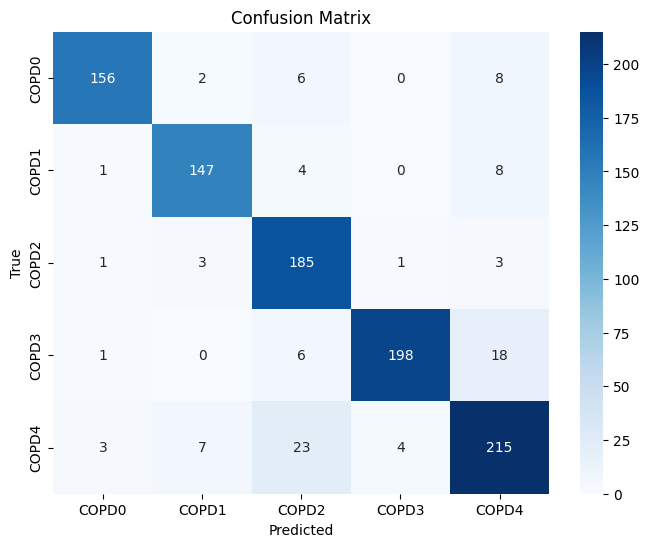

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your custom-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/resnet50_final.h5')

# Specify the directory containing the images you want to classify
image_directory = '/content/res'

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# List of class labels, replace with your actual labels
class_labels = ['COPD0', 'COPD1', 'COPD2', 'COPD3', 'COPD4']

# Loop through the images in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Adjust the file extension as needed
        img_path = os.path.join(image_directory, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize the pixel values

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        predicted_label = class_labels[predicted_class[0]]

        # Extract the true label from the filename, assuming a naming convention like 'COPD1_image.jpg'
        #print(filename)
        true_label = filename.split('_')[0]
        #print(true_label)
        true_labels.append(true_label)
        predicted_labels.append(predicted_label)
# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report
#print(classification_report(true_labels, predicted_labels, target_names=class_labels))

In [ ]:
from sklearn.metrics import classification_report

# Replace 'true_labels' and 'predicted_labels' with your actual ground truth and predicted labels
 # Predicted labels

# Create a classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)


from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print('----------------------------------------------------------')
# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

       COPD0       0.96      0.91      0.93       172
       COPD1       0.92      0.92      0.92       160
       COPD2       0.83      0.96      0.89       193
       COPD3       0.98      0.89      0.93       223
       COPD4       0.85      0.85      0.85       252

    accuracy                           0.90      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.90      0.90      1000

----------------------------------------------------------
Accuracy: 0.90


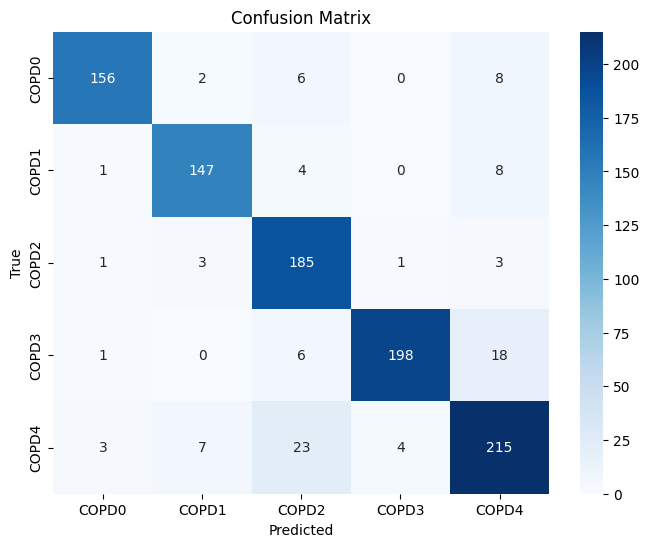

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
